<a href="https://colab.research.google.com/github/Nawapon19/ml_practice/blob/main/Rainfall_prediction_using_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rainfall prediction using Linear regression**

In [149]:
# import libraries
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [150]:
# read the dataset of "Austin Weather" in a pandas dataframe
data = pd.read_csv("austin_weather.csv")

In [151]:
# inspect the data
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [153]:
# drop or delete the unnecessary columns in the data
data = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches', 'SeaLevelPressureLowInches'], axis=1)

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   TempHighF                  1319 non-null   int64 
 1   TempAvgF                   1319 non-null   int64 
 2   TempLowF                   1319 non-null   int64 
 3   DewPointHighF              1319 non-null   object
 4   DewPointAvgF               1319 non-null   object
 5   DewPointLowF               1319 non-null   object
 6   HumidityHighPercent        1319 non-null   object
 7   HumidityAvgPercent         1319 non-null   object
 8   HumidityLowPercent         1319 non-null   object
 9   SeaLevelPressureAvgInches  1319 non-null   object
 10  VisibilityHighMiles        1319 non-null   object
 11  VisibilityAvgMiles         1319 non-null   object
 12  VisibilityLowMiles         1319 non-null   object
 13  WindHighMPH                1319 non-null   object
 14  WindAvgM

In [155]:
# some values have 'T' which denotes trace rainfall
# replace all 'T' with 0
data = data.replace('T', 0.0)

# the data also contains '-' which indicates no
# replace all '-' with 0
data = data.replace('-', 0.0)

In [156]:
# save cleaned data in a csv file
data.to_csv('austin_final.csv')

In [157]:
# read the cleaned data
data = pd.read_csv("austin_final.csv")

In [158]:
# 'X' the features used to train the model
# 'PrecipitationSumInches' will serve as the label
X = data.drop(['PrecipitationSumInches'], axis=1)

# 'Y' the label
Y = data['PrecipitationSumInches']
# reshape 'Y' to 2-D vector
Y.values.reshape(-1, 1)

array([[0.46],
       [0.  ],
       [0.  ],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

In [159]:
# initialize a linear regression classifier
clf = LinearRegression()

In [160]:
# train the classifier with input data X, Y
clf.fit(X, Y)

LinearRegression()

In [161]:
# create new input for prediction
# 2-D vector that contains values for each column in the dataset
inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45], [57], [29.68], [10], [7], [2], [0], [20], [4], [31]])
inp = inp.reshape(1, -1)

In [162]:
# predict and print the output
print('The precipitation in inches for the input is: ', clf.predict(inp))

The precipitation in inches for the input is:  [1.33868402]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


the precipitation trend graph: 


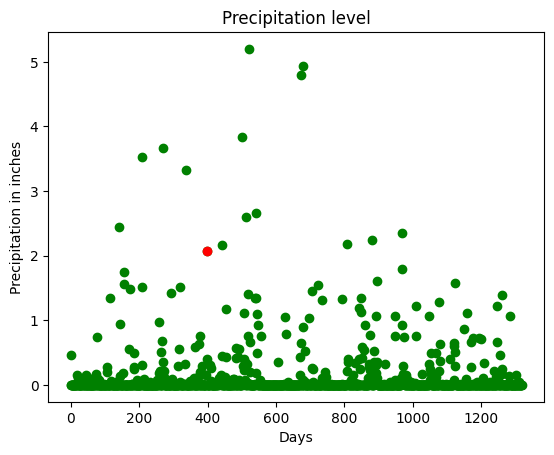

Precipitation vs selected attributes graph: 


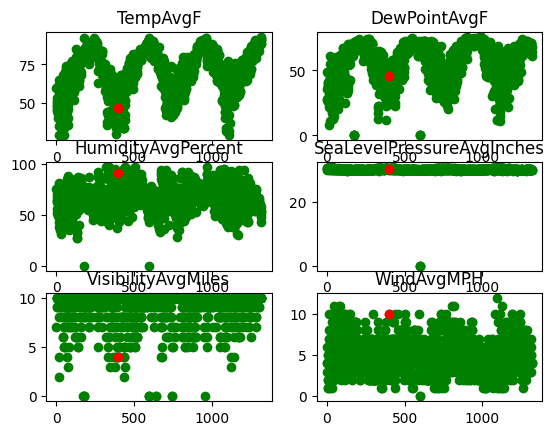

In [163]:
# pick a random day in the dataset and plot graph to observe
day_index = 397
days = [i for i in range(Y.size)]

# plot graph of the percipitation levels vs total number of days
print("the precipitation trend graph: ")

plt.scatter(days, Y, color='g')
plt.scatter(days[day_index], Y[day_index], color='r')
plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")

plt.show()

# plot graph precipitation vs selected attributes
x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'], axis=1)

print("Precipitation vs selected attributes graph: ")

for i in range(x_vis.columns.size):
  plt.subplot(3, 2, i+1)
  plt.scatter(days, x_vis[x_vis.columns.values[i]], color='g')
  plt.scatter(days[day_index], x_vis[x_vis.columns.values[i]][day_index], color='r')
  plt.title(x_vis.columns.values[i])

plt.show()
